# Credit Card Dataset for Clustering

In this project, we'll use the 'Credit Card Dataset for Clustering' provided by Kaggle.


Dataset description : This dataset was derived and simplified for learning purposes. It includes usage behaviour of about 9000 active credit card holders during 6 months period. This case requires to develop a customer segmentation to define marketing strategy.

➡️ Dataset link 

https://i.imgur.com/gAT5gVg.jpg

- **Columns explanation :** 

- CUST_ID: Identification of Credit Card holder (Categorical)
- BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES: Amount of purchases made from account 
- CASH_ADVANCE: Cash in advance given by the user
- CREDIT_LIMIT: Limit of Credit Card for user 
- PAYMENTS: Amount of Payment done by user 



### Instructions

- Import you data and perform basic data2.  exploration phase
- Perform the necessary data preparation steps ( Corrupted and missing values handling, a encoding, outl3. iers handling ... )
- Perform hierarchical clustering to identify the inherent groupings within your data. Then, plot the clusters. (use only 2 features. For example, try to cluster the customer base with respect to 'PURCHASES'4.  and 'credit limit')
- Perform partitional clustering using the K-means algorithm. Th5. en, plot the clusters
- Find the best k value and pl6. ot the clusters again.
- Interpret the results

In [2]:
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import necessary libraries
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.preprocessing import StandardScaler  
from sklearn.cluster import AgglomerativeClustering  
from scipy.cluster.hierarchy import dendrogram, linkage  

In [5]:
df = pd.read_csv("Credit_card_dataset.csv")

In [8]:
df.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [10]:
df.shape

(8950, 6)

In [12]:
df.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64

In [14]:
df = df.dropna()

In [16]:
df.duplicated().sum()

0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8949 non-null   object 
 1   BALANCE_FREQUENCY  8949 non-null   float64
 2   PURCHASES          8949 non-null   float64
 3   PAYMENTS           8949 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8949 non-null   float64
dtypes: float64(5), object(1)
memory usage: 489.4+ KB


There are no categorical columns to encode

In [21]:
# Extract the relevant features
X = df[["PURCHASES", "CREDIT_LIMIT"]]

In [23]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
linked = linkage(X_scaled, method='ward')

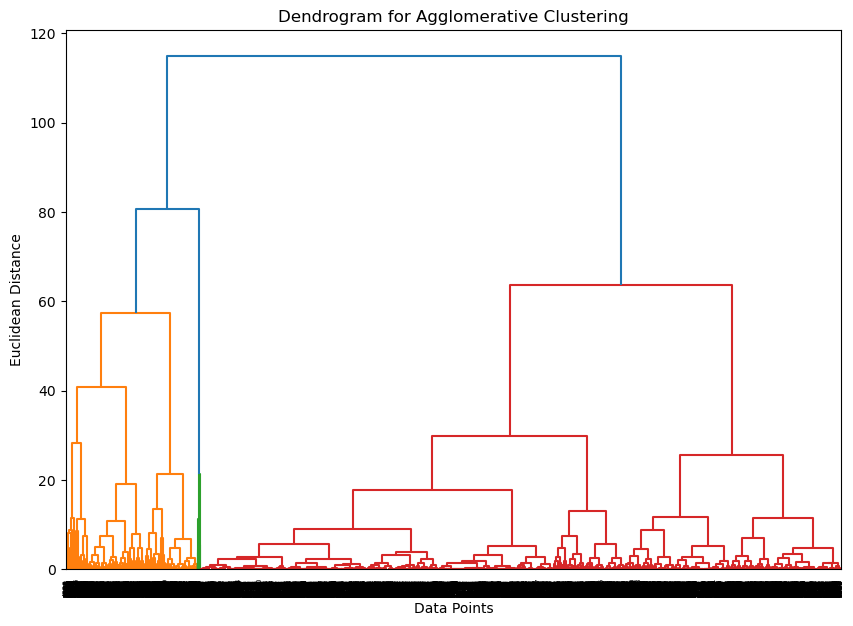

In [27]:
# Create a new figure with a specific size for the dendrogram
plt.figure(figsize=(10, 7))

dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)

# Add a title to the plot to describe it as a dendrogram for agglomerative clustering
plt.title('Dendrogram for Agglomerative Clustering')

# Label the x-axis as 'Data Points' since the horizontal axis represents the individual data points or clusters
plt.xlabel('Data Points')

# Label the y-axis as 'Euclidean Distance' because the vertical axis represents the distance between merged clusters
plt.ylabel('Euclidean Distance')

# Display the plot
plt.show()

In [28]:
agglom = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')

In [29]:
clusters = agglom.fit_predict(X_scaled)

In [30]:
df['Cluster'] = clusters

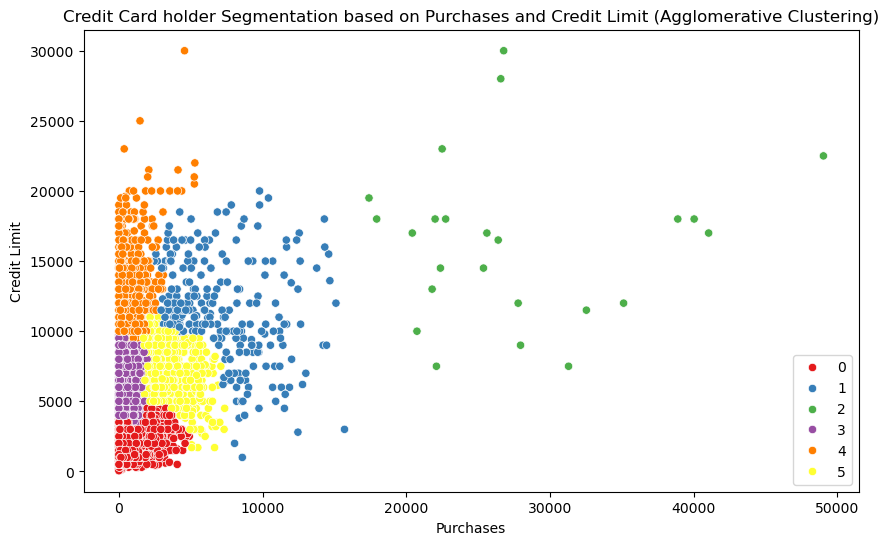

In [35]:
# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PURCHASES'], y=df['CREDIT_LIMIT'], hue=df['Cluster'], palette='Set1')
plt.title('Credit Card holder Segmentation based on Purchases and Credit Limit (Agglomerative Clustering)')
plt.xlabel('Purchases')
plt.ylabel('Credit Limit')
plt.legend()
plt.show()

### K means Clustering

In [38]:
# Import necessary libraries
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.cluster import KMeans 

In [40]:
df = pd.read_csv("Credit_card_dataset.csv")

In [42]:
df.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [46]:
df.shape

(8950, 6)

In [48]:
df.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64

In [50]:
df = df.dropna()

In [52]:
# Extract the relevant features
X = df[["PURCHASES", "CREDIT_LIMIT"]]

In [54]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

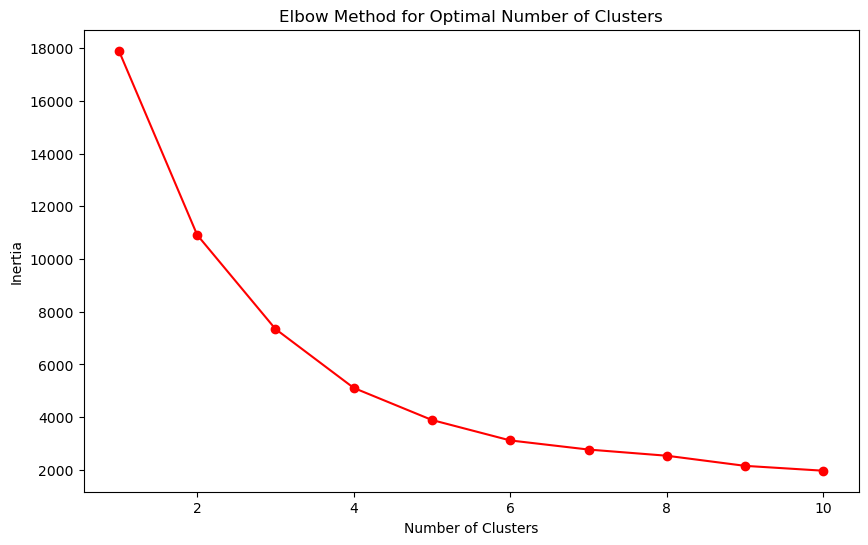

In [56]:
inertia = []  # List to store the inertia values for each number of clusters

for i in range(1, 11):  # Loop over cluster numbers from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)  # Initialize KMeans with the current number of clusters (i)
    kmeans.fit(X_scaled)  # Fit the KMeans model on the standardized data
    inertia.append(kmeans.inertia_)  # Append the inertia (sum of squared distances) to the list

# Plot the Elbow curve
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.plot(range(1, 11), inertia, 'ro-')  # Plot the number of clusters against inertia with red markers and lines
# 'r': Specifies the color of the plot, in this case, red (r stands for red).
# 'o': Specifies the marker style, which in this case is a circle (o).
# '-': Specifies the line style, which in this case is a solid line (-).

plt.title('Elbow Method for Optimal Number of Clusters')  # Add a title to the plot
plt.xlabel('Number of Clusters')  # Label the x-axis as 'Number of Clusters'
plt.ylabel('Inertia')  # Label the y-axis as 'Inertia' (within-cluster sum of squares)
plt.show()  # Display the plot

In [58]:
# Fit K-Means with 5 clusters
kmeans = KMeans(n_clusters=6, random_state=42) 
kmeans.fit(X_scaled)

KMeans(n_clusters=6, random_state=42)

In [60]:
df['Cluster'] = kmeans.labels_

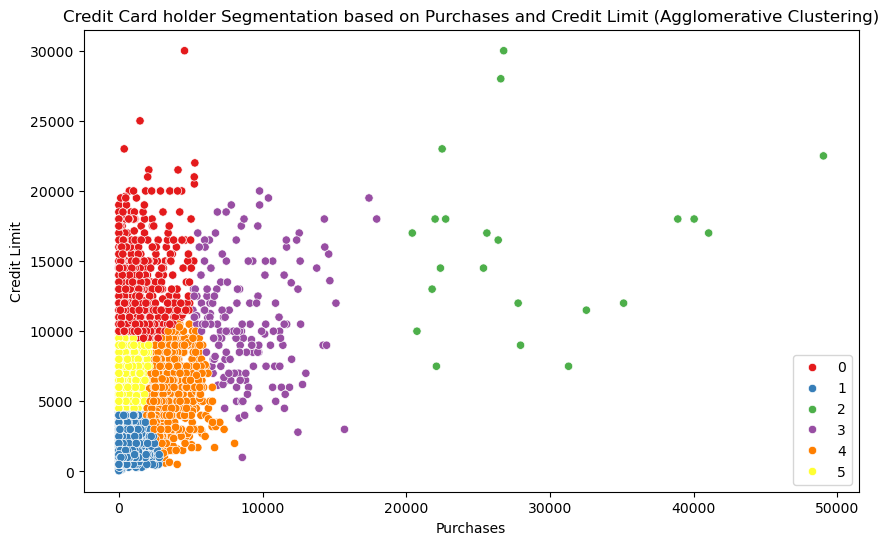

In [62]:
# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PURCHASES'], y=df['CREDIT_LIMIT'], hue=df['Cluster'], palette='Set1')
plt.title('Credit Card holder Segmentation based on Purchases and Credit Limit (Agglomerative Clustering)')
plt.xlabel('Purchases')
plt.ylabel('Credit Limit')
plt.legend()
plt.show()